Import Library


In [122]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

Read CSV

In [28]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/churn_customers.csv')
print(df)

    customerID  gender  SeniorCitizen  tenure PhoneService     MultipleLines  \
0     CUST0001  Female              0      56          Yes               Yes   
1     CUST0002  Female              0      19           No               Yes   
2     CUST0003  Female              0      29          Yes                No   
3     CUST0004    Male              1      51          Yes                No   
4     CUST0005    Male              1      21           No               Yes   
..         ...     ...            ...     ...          ...               ...   
995   CUST0996    Male              1      13           No                No   
996   CUST0997    Male              1      71           No                No   
997   CUST0998    Male              1       4           No               Yes   
998   CUST0999    Male              1      25          Yes  No phone service   
999   CUST1000  Female              1      68          Yes               Yes   

    InternetService       OnlineSecurit

EDA

In [29]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   tenure            1000 non-null   int64  
 4   PhoneService      1000 non-null   object 
 5   MultipleLines     1000 non-null   object 
 6   InternetService   1000 non-null   object 
 7   OnlineSecurity    1000 non-null   object 
 8   OnlineBackup      1000 non-null   object 
 9   DeviceProtection  1000 non-null   object 
 10  TechSupport       1000 non-null   object 
 11  StreamingTV       1000 non-null   object 
 12  StreamingMovies   1000 non-null   object 
 13  Contract          1000 non-null   object 
 14  PaperlessBilling  1000 non-null   object 
 15  PaymentMethod     1000 non-null   object 
 16  MonthlyCharges    1000 non-null   float64
 

In [30]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("\n### Missing Values after Conversion ###")
print(df.isnull().sum())


### Missing Values after Conversion ###
customerID          0
gender              0
SeniorCitizen       0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1000 non-null   object 
 1   gender            1000 non-null   object 
 2   SeniorCitizen     1000 non-null   int64  
 3   tenure            1000 non-null   int64  
 4   PhoneService      1000 non-null   object 
 5   MultipleLines     1000 non-null   object 
 6   InternetService   1000 non-null   object 
 7   OnlineSecurity    1000 non-null   object 
 8   OnlineBackup      1000 non-null   object 
 9   DeviceProtection  1000 non-null   object 
 10  TechSupport       1000 non-null   object 
 11  StreamingTV       1000 non-null   object 
 12  StreamingMovies   1000 non-null   object 
 13  Contract          1000 non-null   object 
 14  PaperlessBilling  1000 non-null   object 
 15  PaymentMethod     1000 non-null   object 
 16  MonthlyCharges    1000 non-null   float64
 

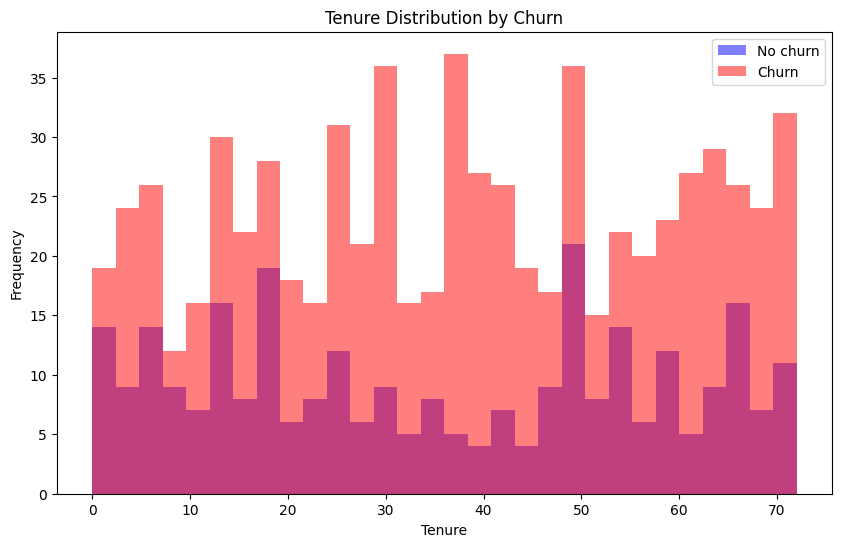

In [41]:
plt.figure(figsize=(10, 6))
churn_yes = df[df['Churn'] == 'Yes'].iloc[:, 3]
churn_no = df[df['Churn'] == 'No'].iloc[:, 3]
plt.hist(churn_yes, bins=30, alpha=0.5, label = 'No churn', color = 'blue')
plt.hist(churn_no, bins=30, alpha=0.5, label = 'Churn', color = 'red')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution by Churn')
plt.legend()
plt.show()

<ipython-input-60-c0e2bb07a8dd>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([churn_yes, churn_no], labels=['Churn', 'No Churn'])


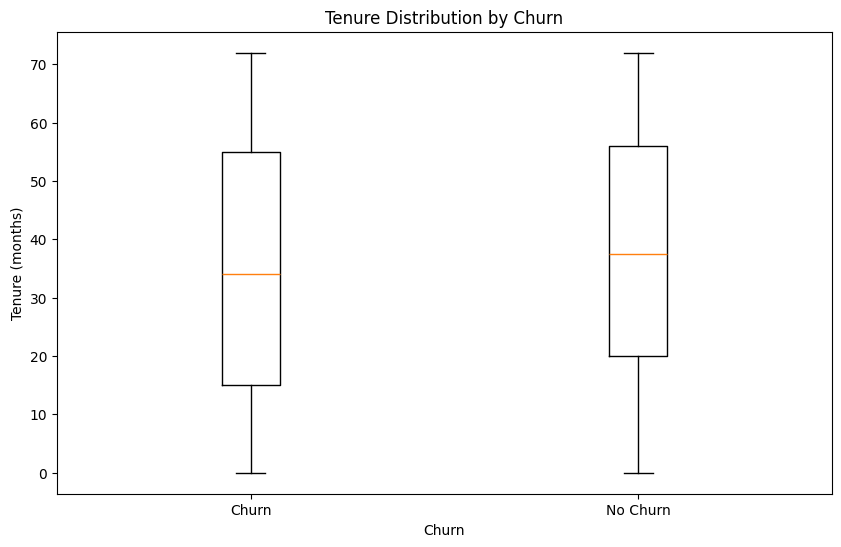

In [60]:
plt.figure(figsize=(10, 6))
plt.boxplot([churn_yes, churn_no], labels=['Churn', 'No Churn'])
plt.title("Tenure Distribution by Churn")
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')

plt.show()


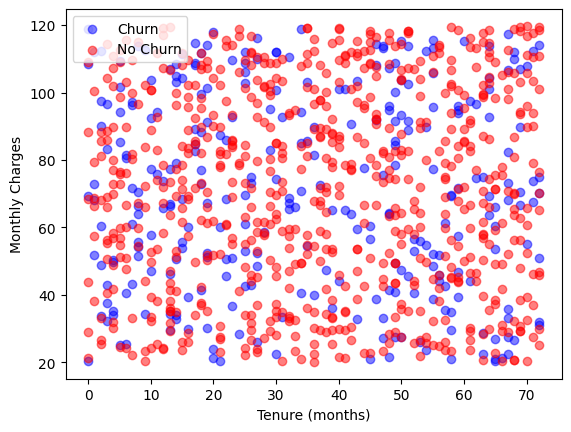

In [65]:
from itertools import combinations
churn_yes = df[df["Churn"] == "Yes"]
churn_no = df[df["Churn"] == "No"]

plt.scatter(churn_yes.iloc[:, 3], churn_yes['MonthlyCharges'], color = 'blue', label = 'Churn', alpha = 0.5)
plt.scatter(churn_no.iloc[:, 3], churn_no['MonthlyCharges'], color = 'red', label = 'No Churn', alpha = 0.5)
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.legend()
plt.show()




Encoding

In [147]:
label_encoder = {}
categorical_col = ['gender', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in categorical_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoder[col] = le


Splitting Data

In [158]:
X = df.drop(columns = ['customerID', 'Churn'])
y = df['Churn']
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature Scaling

In [150]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training - Logistic Regression

In [151]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("\n### Logistic Regression Model ###")
print(classification_report(y_test, y_pred_lr))


### Logistic Regression Model ###
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       136
           1       0.00      0.00      0.00        64

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.55       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Training - Naive Bayes

In [152]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("\n### Naive Bayes Model ###")
print(classification_report(y_test, y_pred_nb))



### Naive Bayes Model ###
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       136
           1       0.00      0.00      0.00        64

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.55       200



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Model Training - Random Forest

In [153]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("\n### Random Forest Model ###")
print(classification_report(y_test, y_pred_rf))


### Random Forest Model ###
              precision    recall  f1-score   support

           0       0.69      0.98      0.81       136
           1       0.50      0.05      0.09        64

    accuracy                           0.68       200
   macro avg       0.59      0.51      0.45       200
weighted avg       0.63      0.68      0.58       200



Prevent Overtfitting - Cross Validation

In [154]:
cv_score_rf_model = cross_val_score(rf_model, X_train, y_train, cv = 5)
print("\n### Cross-Validation Scores ###")
print(cv_score_rf_model)
print(f"Mean CV Accuracy: {cv_score_rf_model.mean():.4f}")

cv_score_nb_model = cross_val_score(nb_model, X_train, y_train, cv = 5)
print("\n### Cross-Validation Scores ###")
print(cv_score_nb_model)
print(f"Mean CV Accuracy: {cv_score_nb_model.mean():.4f}")

cv_score_lr_model = cross_val_score(lr_model, X_train, y_train, cv = 5)
print("\n### Cross-Validation Scores ###")
print(cv_score_lr_model)
print(f"Mean CV Accuracy:  {cv_score_lr_model.mean():.4f}")


### Cross-Validation Scores ###
[0.70625 0.7125  0.725   0.6875  0.7125 ]
Mean CV Accuracy: 0.7087

### Cross-Validation Scores ###
[0.73125 0.71875 0.71875 0.725   0.71875]
Mean CV Accuracy: 0.7225

### Cross-Validation Scores ###
[0.73125 0.725   0.71875 0.71875 0.71875]
Mean CV Accuracy:  0.7225


Prominent (Random Forest)

In [155]:
prominent_rf = rf_model.feature_importances_
prominent_rf_df = pd.DataFrame({'Feature': X.columns, 'Prominent': prominent_rf})
prominent_rf_df = prominent_rf_df.sort_values(by = 'Prominent', ascending = False)
print("\n### Feature Importances ###")
print(prominent_rf_df.head(10))


### Feature Importances ###
             Feature  Prominent
15    MonthlyCharges   0.158509
16      TotalCharges   0.151345
2             tenure   0.137273
14     PaymentMethod   0.055038
4      MultipleLines   0.046986
6     OnlineSecurity   0.044924
7       OnlineBackup   0.044436
12          Contract   0.043944
5    InternetService   0.043584
8   DeviceProtection   0.043157


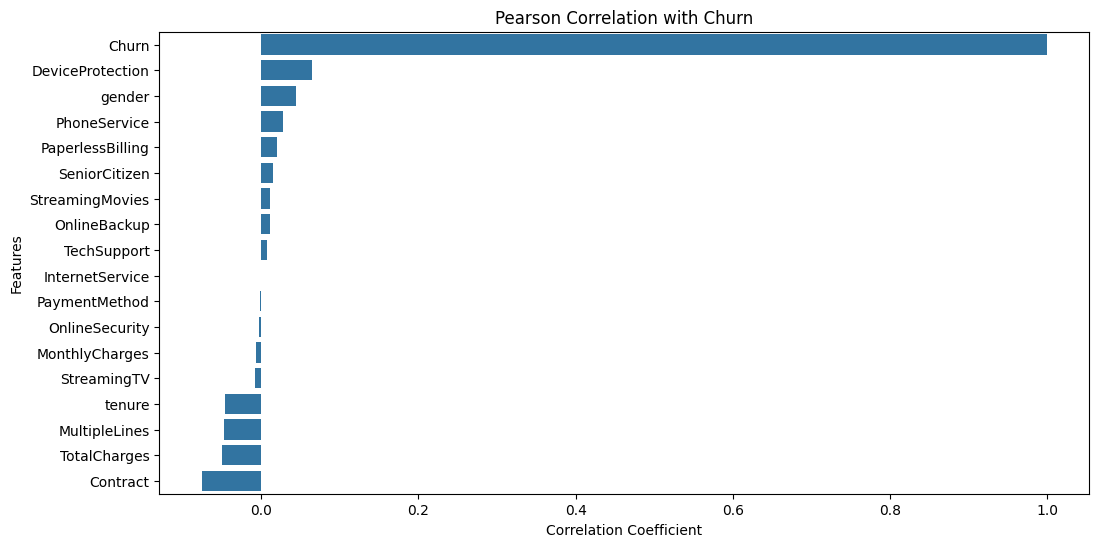

In [163]:
df_numeric = df.drop(columns=['customerID']).apply(pd.to_numeric, errors='coerce')


pearson_corr = df_numeric.corrwith(df_numeric['Churn']).sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=pearson_corr.values, y=pearson_corr.index)
plt.title('Pearson Correlation with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()